In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pandas as pd
from skimage.color.colorconv import gray2rgb
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from sklearn.cluster import KMeans
from math import log2
from collections import OrderedDict
from numpy.lib.function_base import median

In [3]:
items = os.listdir('/content/gdrive/MyDrive/Child_bellastoma/gomes/')
path= '/content/gdrive/MyDrive/Child_bellastoma/gomes/'

img_array = []

for each_image in items:
  if each_image.endswith(".jpg"):

    full_path = "/content/gdrive/MyDrive/Child_bellastoma/gomes/"+each_image
    image = cv2.imread(full_path)
    img_array.append(image)

In [4]:
ex=img_array[7]

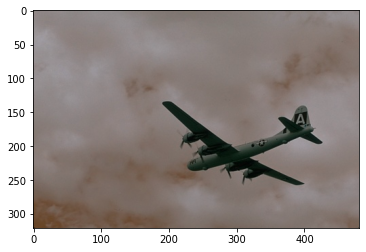

In [5]:
plt.imshow(ex)

In [6]:
image_ex = cv2.cvtColor(ex, cv2.COLOR_BGR2RGB) 
                                                 #we are using opencv2 library
                                                 #conversion of bgr to rgb as by default its bgr in open cv
                                                 #after runnin this cell its rgb cell

In [7]:
image_ex.shape

(321, 481, 3)

In [8]:
image_ex = image_ex/255
image_ex

array([[[0.52941176, 0.54117647, 0.56078431],
        [0.55294118, 0.56470588, 0.58431373],
        [0.54117647, 0.55294118, 0.57254902],
        ...,
        [0.54117647, 0.54117647, 0.58039216],
        [0.52941176, 0.52941176, 0.56862745],
        [0.45882353, 0.45882353, 0.49019608]],

       [[0.51372549, 0.5254902 , 0.54509804],
        [0.51764706, 0.52941176, 0.54901961],
        [0.50588235, 0.51764706, 0.5372549 ],
        ...,
        [0.54509804, 0.54509804, 0.58431373],
        [0.54117647, 0.54117647, 0.58039216],
        [0.50196078, 0.50196078, 0.53333333]],

       [[0.5254902 , 0.5372549 , 0.56470588],
        [0.51764706, 0.52941176, 0.55686275],
        [0.50980392, 0.52156863, 0.54901961],
        ...,
        [0.5372549 , 0.5372549 , 0.56862745],
        [0.5372549 , 0.5372549 , 0.56862745],
        [0.54117647, 0.54117647, 0.57254902]],

       ...,

       [[0.18039216, 0.29803922, 0.43137255],
        [0.16862745, 0.28627451, 0.41960784],
        [0.14901961, 0

KMEANS

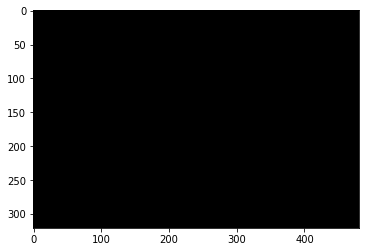

In [9]:
Image=image_ex
if(len(Image.shape)<3):
    x = Image.reshape(-1,1)
elif(len(Image.shape)==3):
    x = Image.reshape(-1,3)
    x = np.float32(x)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
    #Apply Kmeans
    ret,label,center=cv2.kmeans(x,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    #Now convert back the float32 data to uint8 and make the image
    center = np.uint8(center)
    res = center[label.flatten()]
    clustered_image = res.reshape((Image.shape))
plt.imshow(clustered_image)

In [10]:
image_ex_reshape = image_ex.reshape((image_ex.shape[0] * image_ex.shape[1], 3))
df_image_clustered = pd.DataFrame(list(zip(image_ex_reshape, label)),
              columns=['pixels','labels'])

In [11]:
sum(df_image_clustered['labels'] == 1)

7462

## **ENTROPY**

In [12]:
def entropy(df1):       #function finds the entropy
  dict1 = OrderedDict()  #we use ordered dictionary to maintain the order of pixels or else each time we run the cell the order of pixel changes

  dict1={}
  for j in range (0,len(df1)):
    for i in df1[j]:
      if i not in dict1.keys():
        dict1[i]=1
      else:
        dict1[i]+=1   #creating a dictionary to store the pixel and its respective count from which we can find the probablity of each pixel

  df_freq=np.zeros([len(df1),3])

  for i in range(0,len(df1)):
    for j in range(0,3):
      for k in dict1.keys(): #checking if the pixel in order and then store this in zero matrix
        if(k == df1[i][j]):
          df_freq[i][j] = dict1[k]

  length_of_image= len(df1)*3  #total no of pixels in cluster
  prob = df_freq/length_of_image  #probablity of pixel matrix

  ent=np.zeros([len(prob),3])  #finding entropy of each pixel

  for i in range(0,len(ent)):
   for j in range(0,3):
     
    ent[i][j] = round(-prob[i][j]*log2(prob[i][j]),4)
    
  return ent

In [14]:
df_image_clustered_1 = df_image_clustered[df_image_clustered['labels']==0]
df_image_clustered_2 = df_image_clustered[df_image_clustered['labels']==1]
df_image_clustered_1.reset_index(inplace = True)
df_image_clustered_2.reset_index(inplace = True)

entropy_1=entropy(df_image_clustered_1['pixels']) #function call for cluster 1
#entropy_2=entropy(df_image_clustered_2['pixels']) #function call for cluster 2

df_image_entropy_1=pd.DataFrame(list(zip(df_image_clustered_1['pixels'], df_image_clustered_1['labels'],entropy_1)),
              columns=['pixels','labels','entropy'])
#df_image_entropy_2=pd.DataFrame(list(zip(df_image_clustered_2['pixels'], df_image_clustered_2['labels'],entropy_2)),
             # columns=['pixels','labels','entropy'])

In [15]:
entropy_2=entropy(df_image_clustered_2['pixels']) #function call for cluster 2
df_image_entropy_2=pd.DataFrame(list(zip(df_image_clustered_2['pixels'], df_image_clustered_2['labels'],entropy_2)),
              columns=['pixels','labels','entropy'])

In [16]:
df_image_entropy_1.head()

,pixels,labels,entropy
0,"[0.5294117647058824, 0.5411764705882353, 0.560...",[0],"[0.1396, 0.1344, 0.116]"
1,"[0.5529411764705883, 0.5647058823529412, 0.584...",[0],"[0.1255, 0.1069, 0.0566]"
2,"[0.5411764705882353, 0.5529411764705883, 0.572...",[0],"[0.1344, 0.1255, 0.08]"
3,"[0.5294117647058824, 0.5411764705882353, 0.560...",[0],"[0.1396, 0.1344, 0.116]"
4,"[0.5294117647058824, 0.5411764705882353, 0.568...",[0],"[0.1396, 0.1344, 0.0919]"


In [17]:
df_image_entropy_2.head()

,pixels,labels,entropy
0,"[0.21176470588235294, 0.2196078431372549, 0.20...",[1],"[0.0415, 0.0352, 0.0396]"
1,"[0.14901960784313725, 0.1568627450980392, 0.13...",[1],"[0.0613, 0.0572, 0.0669]"
2,"[0.09019607843137255, 0.10196078431372549, 0.0...",[1],"[0.1343, 0.1275, 0.1518]"
3,"[0.0784313725490196, 0.09019607843137255, 0.06...",[1],"[0.1484, 0.1343, 0.1565]"
4,"[0.08235294117647059, 0.10196078431372549, 0.0...",[1],"[0.1479, 0.1275, 0.1518]"


## **SUBSPACE**

In [ ]:
r_ent=np.zeros([len(df_image_entropy_1['entropy']),1])  #creating empty matrix with one column each to store r g b
g_ent=np.zeros([len(df_image_entropy_1['entropy']),1])
b_ent=np.zeros([len(df_image_entropy_1['entropy']),1])

x=df_image_entropy_1['entropy']

for i in range (0,len(df_image_entropy_1['entropy'])):

   r_ent[i]=x[i][0] #red
   g_ent[i]=x[i][1] #green
   b_ent[i]=x[i][2] #blue


# creating three empty matrix again to store the labels of pixels from each channel where they are segreagted through median thresholding

r_labels=np.zeros([len(r_ent)]) 
g_labels=np.zeros([len(r_ent)])
b_labels=np.zeros([len(r_ent)])

for i in range(0,len(r_ent)):
 temp = r_ent[i]

 #print(temp)
 if (temp > median(r_ent)):
   r_labels[i] = 1
 else:
   r_labels[i]= 0

for i in range(0,len(r_ent)):
 temp = g_ent[i]
 #print(temp)
 if (temp > median(g_ent)):
   g_labels[i] = 1
 else:
   g_labels[i]= 0

for i in range(0,len(r_ent)):
 temp = b_ent[i]
 #print(temp)
 if (temp > median(b_ent)):
   b_labels[i] = 1
 else:
   b_labels[i]= 0

red_sub = pd.DataFrame(list(zip(r_ent,r_labels)),   #storing in dataframe
              columns=['red','labels'])
green_sub = pd.DataFrame(list(zip(g_ent,g_labels)),
              columns=['green','labels'])
blue_sub = pd.DataFrame(list(zip(b_ent,b_labels)),
              columns=['blue','labels'])

df_image_entropy_1['r labels']=red_sub['labels']
df_image_entropy_1['g labels']=green_sub['labels']
df_image_entropy_1['b labels']=blue_sub['labels']

df_image_entropy_1['gray']=''

#converting them as gray pixels like into one cluster

for i in range (0,len(df_image_entropy_1)):

 if (df_image_entropy_1['r labels'][i]== df_image_entropy_1['g labels'][i]== df_image_entropy_1['b labels'][i]):

   df_image_entropy_1['gray'][i]= df_image_entropy_1['g labels'][i]   

 elif (df_image_entropy_1['r labels'][i]+ df_image_entropy_1['g labels'][i]+df_image_entropy_1['b labels'][i]==1):

   df_image_entropy_1['gray'][i]=0

 elif (df_image_entropy_1['r labels'][i]+ df_image_entropy_1['g labels'][i]+df_image_entropy_1['b labels'][i]==2):
    df_image_entropy_1['gray'][i]=1

df_image_entropy_1['gray']=df_image_entropy_1['gray'].astype(int)
df_image_entropy_1['r labels']=df_image_entropy_1['r labels'].astype(int)
df_image_entropy_1['g labels']=df_image_entropy_1['g labels'].astype(int)
df_image_entropy_1['b labels']=df_image_entropy_1['b labels'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
r_ent=np.empty([len(df_image_entropy_2['entropy']),1])   #similarly do it for the next pixel
g_ent=np.empty([len(df_image_entropy_2['entropy']),1])
b_ent=np.empty([len(df_image_entropy_2['entropy']),1])

x=df_image_entropy_2['entropy']
for i in range (0,len(df_image_entropy_2['entropy'])):
   r_ent[i]=x[i][0] #red
   g_ent[i]=x[i][1] #green
   b_ent[i]=x[i][2] #blue

r_labels=np.empty([len(r_ent)])
for i in range (0,len(r_ent)):
  r_labels[i]=0
g_labels=np.empty([len(r_ent)])
for i in range (0,len(r_ent)):
  g_labels[i]=0
b_labels=np.empty([len(r_ent)])
for i in range (0,len(r_ent)):
  b_labels[i]=0


for i in range(0,len(r_ent)):
 temp = r_ent[i][0]
 #print(temp)
 if (temp > median(r_ent)):
   r_labels[i] = 1
 else:
   r_labels[i]= 0

for i in range(0,len(r_ent)):
 temp = g_ent[i][0]
 #print(temp)
 if (temp > median(g_ent)):
   g_labels[i] = 1
 else:
   g_labels[i]= 0

for i in range(0,len(r_ent)):
 temp = b_ent[i][0]
 #print(temp)
 if (temp > median(b_ent)):
   b_labels[i] = 1
 else:
   b_labels[i]= 0

red_sub = pd.DataFrame(list(zip(r_ent,r_labels)),
              columns=['red','labels'])
green_sub = pd.DataFrame(list(zip(g_ent,g_labels)),
              columns=['green','labels'])
blue_sub = pd.DataFrame(list(zip(b_ent,b_labels)),
              columns=['blue','labels'])

df_image_entropy_2['r labels']=red_sub['labels']
df_image_entropy_2['g labels']=green_sub['labels']
df_image_entropy_2['b labels']=blue_sub['labels']

df_image_entropy_2['gray']=''

for i in range (0,len(df_image_entropy_2)):
 if (df_image_entropy_2['r labels'][i]== df_image_entropy_2['g labels'][i]== df_image_entropy_2['b labels'][i]):
   df_image_entropy_2['gray'][i]= df_image_entropy_2['g labels'][i]
 elif (df_image_entropy_2['r labels'][i]+ df_image_entropy_2['g labels'][i]+df_image_entropy_2['b labels'][i]==1):
   df_image_entropy_2['gray'][i]=0
 elif (df_image_entropy_2['r labels'][i]+ df_image_entropy_2['g labels'][i]+df_image_entropy_2['b labels'][i]==2):
    df_image_entropy_2['gray'][i]=1

df_image_entropy_2['gray']=df_image_entropy_2['gray'].astype(int)
df_image_entropy_2['r labels']=df_image_entropy_2['r labels'].astype(int)
df_image_entropy_2['g labels']=df_image_entropy_2['g labels'].astype(int)
df_image_entropy_2['b labels']=df_image_entropy_2['b labels'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_image_entropy=pd.concat([df_image_entropy_1,df_image_entropy_2],ignore_index=True)

In [ ]:
df_image_entropy #final dataframe

,pixels,labels,entropy,r labels,g labels,b labels,gray
0,"[95, 99, 66]",[0],"[0.0318, 0.03, 0.0341]",1,0,0,0
1,"[100, 104, 71]",[0],"[0.0274, 0.0272, 0.0352]",1,0,0,0
2,"[120, 121, 89]",[0],"[0.0232, 0.0252, 0.0388]",0,0,0,0
3,"[135, 135, 85]",[0],"[0.0233, 0.0233, 0.0388]",0,0,0,0
4,"[85, 84, 28]",[0],"[0.0388, 0.0379, 0.0414]",1,1,0,1
...,...,...,...,...,...,...,...
39195,"[174, 158, 99]",[1],"[0.0375, 0.0258, 0.0248]",0,0,0,0
39196,"[162, 154, 89]",[1],"[0.0291, 0.0303, 0.0252]",0,0,0,0
39197,"[148, 145, 76]",[1],"[0.0242, 0.0287, 0.0193]",0,0,0,0
39198,"[149, 149, 79]",[1],"[0.0225, 0.0225, 0.0214]",0,0,0,0


In [ ]:
cluster_ex=np.zeros(image_ex.shape)

#Mapping back the gray pixels which we got to the original image

In [ ]:
bak = image_ex
for x in range(len(df_image_entropy['pixels'])):
  for i in bak:
    for j in i:
      if (np.array_equiv(df_image_entropy['pixels'][x],j)==True):
        j=df_image_entropy['labels'][x]

In [ ]:
for i in x:
  for j in i:
    for k in range(len(df_image_entropy['pixels'])):
      temp=df_image_entropy['pixels'][k]
      if(np.array_equiv(temp,j)==True):
        j=df_image_entropy['gray'][k]

In [ ]:
for i in range(0,len(df_image_entropy)):
  for j in range (0,321):
     for k in range (0,481):
       temp= df_image_entropy['pixels'][i]
       if(np.array_equiv(image_ex[j][k],temp)==True):
          cluster_ex[j][k]=df_image_entropy['gray'][i]

In [ ]:
x=cluster_ex
for i in range (0,81):
  for j in range (0,104):
    if(x[i][j] ==0):
      x[i][j]=100
    if(x[i][j] ==1):
      x[i][j]=250

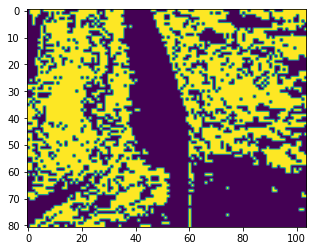

In [ ]:
plt.imshow(x)  

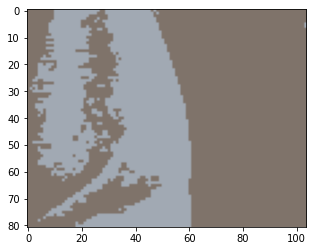

In [ ]:
plt.imshow(clustered_image)